# Clustering
# Assignment Theoretical Questions

## 1. What is unsupervised learning in the context of machine learning?

-> Unsupervised learning is a type of ML where the algorithm works with unlabeled data. The system tries to discover hidden patterns, groupings, or structures (like clusters or associations) without predefined outputs.


## 2. How does K-Means clustering algorithm work?

-> Choose the number of clusters (k).
Randomly initialize k centroids.
Assign each data point to the nearest centroid.
Update centroids as the mean of assigned points
Repeat assignment & update until convergence (centroids stop changing).


## 3. Explain the concept of a dendrogram in hierarchical clustering.

-> A dendrogram is a tree-like diagram that shows the merging or splitting of clusters at different distances. The vertical axis represents distance (or dissimilarity), while the horizontal axis lists the data points.


## 4. What is the main difference between K-Means and Hierarchical Clustering?

-> K-Means requires the number of clusters upfront, is faster, but sensitive to initialization.
Hierarchical clustering builds a hierarchy of clusters, doesn't need k initially, but is computationally more expensive.


## 5. What are the advantages of DBSCAN over K-Means?

-> Detects clusters of arbitrary shape.
Doesn't require specifying number of clusters.
Can identify noise/outliers naturally.
Works well with varying cluster densities.


## 6. When would you use Silhouette Score in clustering?

-> When you want to measure how well clusters are separated and how dense they are.
Score ranges: -1 (wrong clustering), 0 (overlapping clusters), +1 (well-separated).


## 7. What are the limitations of Hierarchical Clustering?

-> Computationally expensive for large datasets (O(n²)).
Sensitive to noise and outliers.
Once merged or split, clusters cannot be undone.


## 8. Why is feature scaling important in clustering algorithms like K-Means?

-> K-Means uses Euclidean distance to measure similarity. If features are on different scales (e.g., age in years vs. salary in lakhs), larger-scaled features dominate clustering. Scaling (standardization or normalization) fixes this.


## 9. How does DBSCAN identify noise points?

-> A point is labeled noise if it is not within the neighborhood (eps) of any core point and does not belong to any cluster.


## 10. Define inertia in the context of K-Means.

-> Inertia is the sum of squared distances between each point and its assigned centroid. Lower inertia means tighter clusters.


## 11. What is the elbow method in K-Means clustering?

-> A technique to find the optimal number of clusters (k). Plot inertia vs. k. The point where the decrease slows down (forms an “elbow”) is chosen as the best k.


## 12. Describe the concept of "density" in DBSCAN.

-> Density is defined by two parameters:
eps: maximum neighborhood radius.
min_samples: minimum number of points required to form a dense region.
A region is “dense” if it has at least min_samples within eps.


## 13. Can hierarchical clustering be used on categorical data?

-> Yes, but not directly with Euclidean distance. You need suitable distance measures (e.g., Hamming, Jaccard) or encoding schemes to handle categorical data.


## 14. What does a negative Silhouette Score indicate?

-> It means the point is likely assigned to the wrong cluster, as it is closer to points in another cluster than to its own.


## 15. Explain the term "linkage criteria" in hierarchical clustering.

-> It defines how distances between clusters are measured when merging:
Single linkage: minimum distance.
Complete linkage: maximum distance.
Average linkage: average distance.
Ward's method: minimizes variance within clusters.


## 16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

-> Because K-Means assumes clusters are:
Spherical (equal variance)
Similar in size
Equal density
If clusters differ in density or shape, K-Means misclassifies points.


## 17. What are the core parameters in DBSCAN, and how do they influence clustering?

-> eps: radius for neighborhood. Smaller eps → more, smaller clusters.
min_samples: minimum points to form a dense region. Higher min_samples → stricter clusters.


## 18. How does K-Means++ improve upon standard K-Means initialization?

-> Instead of random initialization, it spreads out initial centroids by choosing them based on probability proportional to distance. This reduces chances of poor clustering and speeds up convergence.


## 19. What is agglomerative clustering?

-> A bottom-up hierarchical method where each point starts as its own cluster, and the algorithm merges the closest clusters step by step until only one remains (or desired number).


## 20. What makes Silhouette Score a better metric than just inertia for model evaluation?

-> Inertia only measures compactness (tightness) of clusters, but ignores separation between them.
Silhouette Score considers both cohesion (how close points are within a cluster) and separation (how far apart different clusters are), making it a more reliable evaluation metric.
Would you like me to also create a summary table (K-Means vs Hierarchical vs DBSCAN with key points: assumptions, strengths, weaknesses, best use cases)?
Unlock more with Plus
ChatGPT Plus gives you higher limits, smarter models, and Sora for video.

# Practical Questions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons, make_circles, load_iris, load_wine, load_breast_cancer, load_digits
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

sns.set(style="whitegrid")

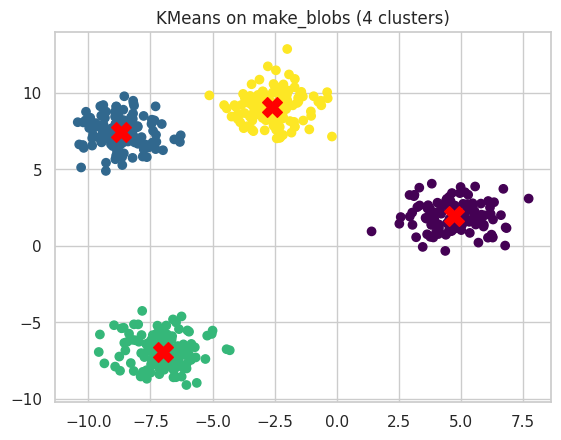

In [2]:
# 1

X, _ = make_blobs(n_samples=500, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="red", marker="X", s=200)
plt.title("KMeans on make_blobs (4 clusters)")
plt.show()

In [3]:
# 2

iris = load_iris()
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(iris.data)
print("First 10 Agglomerative labels (Iris):", labels[:10])

First 10 Agglomerative labels (Iris): [1 1 1 1 1 1 1 1 1 1]


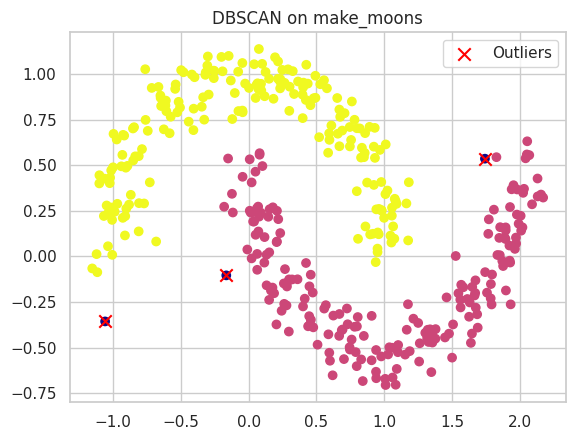

In [4]:
# 3

X, _ = make_moons(n_samples=400, noise=0.1, random_state=42)
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
plt.scatter(X[:,0], X[:,1], c=db.labels_, cmap="plasma")
plt.scatter(X[db.labels_==-1,0], X[db.labels_==-1,1], c="red", marker="x", s=80, label="Outliers")
plt.title("DBSCAN on make_moons")
plt.legend()
plt.show()

In [5]:
# 4

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)
km = KMeans(n_clusters=3, random_state=42).fit(X)
unique, counts = np.unique(km.labels_, return_counts=True)
print("Cluster sizes (Wine):", dict(zip(unique, counts)))

Cluster sizes (Wine): {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


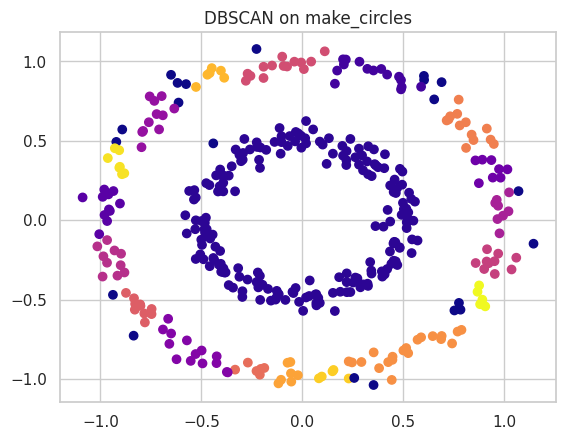

In [6]:
# 5

X, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)
db = DBSCAN(eps=0.1, min_samples=5).fit(X)
plt.scatter(X[:,0], X[:,1], c=db.labels_, cmap="plasma")
plt.title("DBSCAN on make_circles")
plt.show()

In [7]:
# 6

cancer = load_breast_cancer()
X = MinMaxScaler().fit_transform(cancer.data)
km = KMeans(n_clusters=2, random_state=42).fit(X)
print("Cluster centroids (Breast Cancer):\n", km.cluster_centers_)


Cluster centroids (Breast Cancer):
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


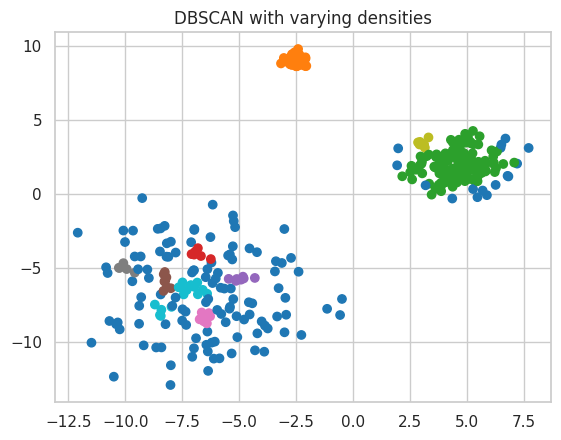

In [9]:
# 7

X, _ = make_blobs(n_samples=500, centers=3, cluster_std=[0.2, 1.0, 2.5], random_state=42)
db = DBSCAN(eps=0.5, min_samples=5).fit(X)
plt.scatter(X[:,0], X[:,1], c=db.labels_, cmap="tab10")
plt.title("DBSCAN with varying densities")
plt.show()

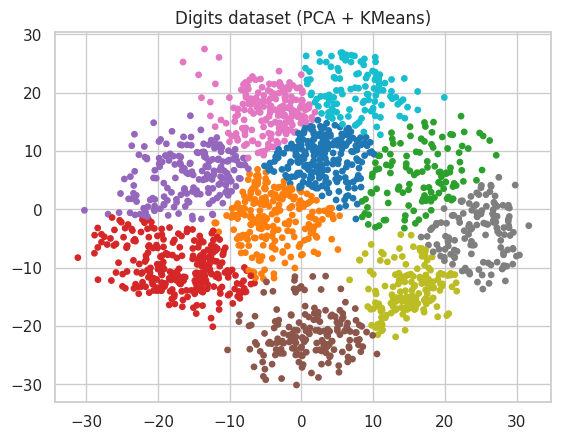

In [10]:
# 8

digits = load_digits()
X_pca = PCA(n_components=2).fit_transform(digits.data)
km = KMeans(n_clusters=10, random_state=42).fit(X_pca)
plt.scatter(X_pca[:,0], X_pca[:,1], c=km.labels_, cmap="tab10", s=15)
plt.title("Digits dataset (PCA + KMeans)")
plt.show()

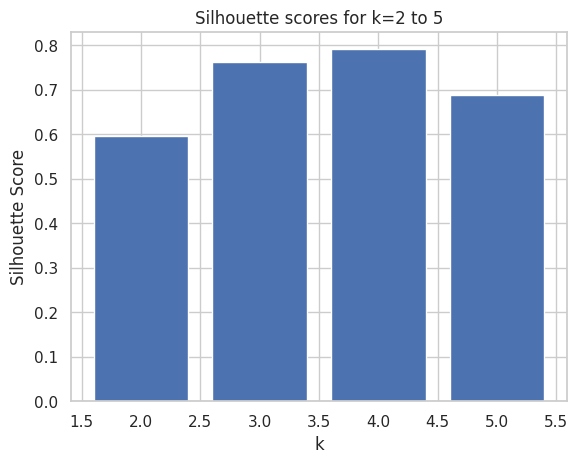

In [11]:
# 9

X, _ = make_blobs(n_samples=500, centers=4, random_state=42)
scores = []
for k in range(2,6):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    scores.append(silhouette_score(X, km.labels_))

plt.bar(range(2,6), scores)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette scores for k=2 to 5")
plt.show()

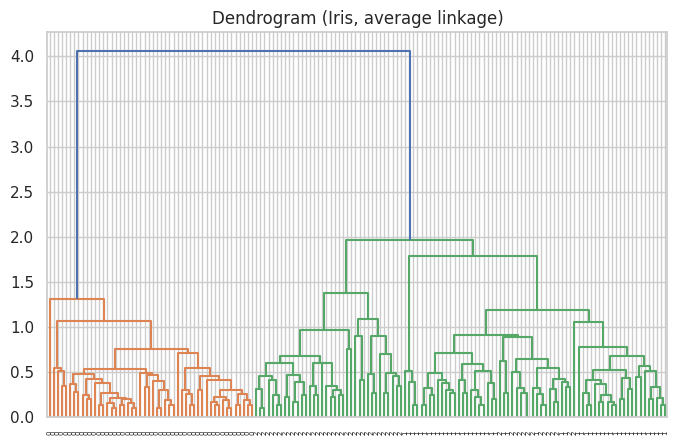

In [12]:
# 10

linked = linkage(iris.data, method="average")
plt.figure(figsize=(8,5))
dendrogram(linked, labels=iris.target, leaf_rotation=90)
plt.title("Dendrogram (Iris, average linkage)")
plt.show()

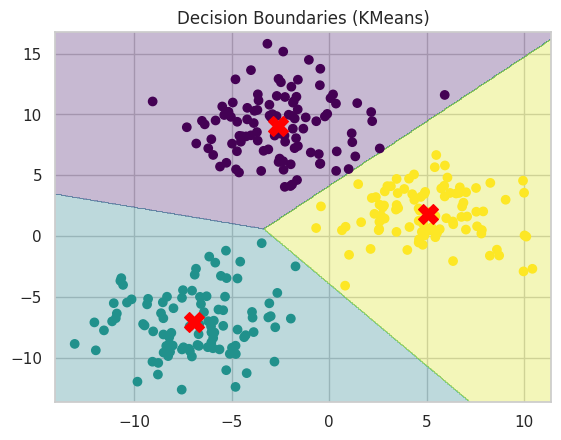

In [13]:
# 11

from matplotlib.colors import ListedColormap
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=2.5, random_state=42)
km = KMeans(n_clusters=3, random_state=42).fit(X)

h = .05
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
plt.scatter(X[:, 0], X[:, 1], c=km.labels_, cmap="viridis")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker="X", s=200, c="red")
plt.title("Decision Boundaries (KMeans)")
plt.show()

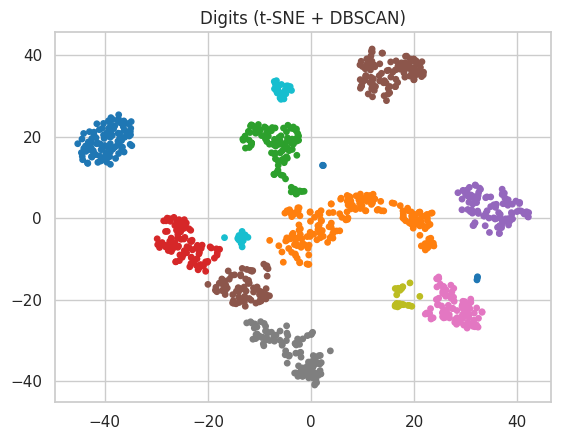

In [14]:
# 12

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(digits.data[:1000])
db = DBSCAN(eps=3, min_samples=5).fit(X_tsne)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=db.labels_, cmap="tab10", s=15)
plt.title("Digits (t-SNE + DBSCAN)")
plt.show()

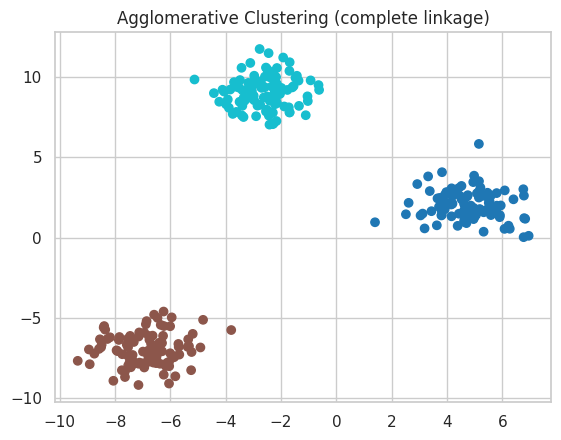

In [15]:
# 13

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
agg = AgglomerativeClustering(n_clusters=3, linkage="complete")
labels = agg.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, cmap="tab10")
plt.title("Agglomerative Clustering (complete linkage)")
plt.show()

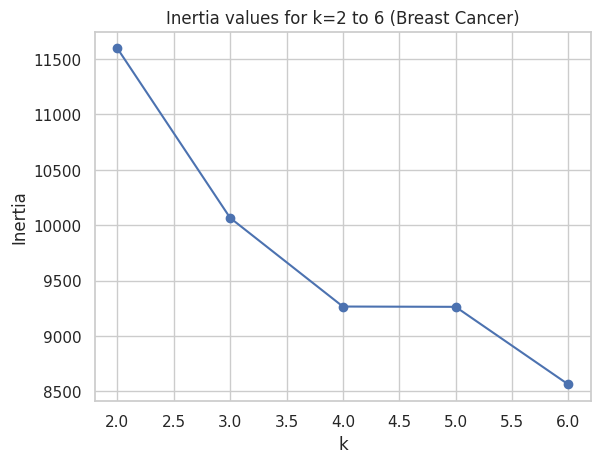

In [16]:
# 14

X = StandardScaler().fit_transform(cancer.data)
inertias = []
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(km.inertia_)

plt.plot(range(2,7), inertias, marker="o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Inertia values for k=2 to 6 (Breast Cancer)")
plt.show()

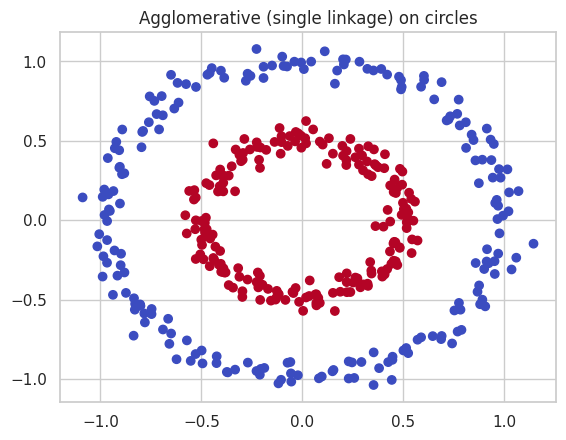

In [17]:
# 15

X, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)
agg = AgglomerativeClustering(n_clusters=2, linkage="single")
labels = agg.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, cmap="coolwarm")
plt.title("Agglomerative (single linkage) on circles")
plt.show()

In [18]:
# 16

X = StandardScaler().fit_transform(wine.data)
db = DBSCAN(eps=2, min_samples=5).fit(X)
n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print("Number of clusters in Wine (excluding noise):", n_clusters)

Number of clusters in Wine (excluding noise): 5


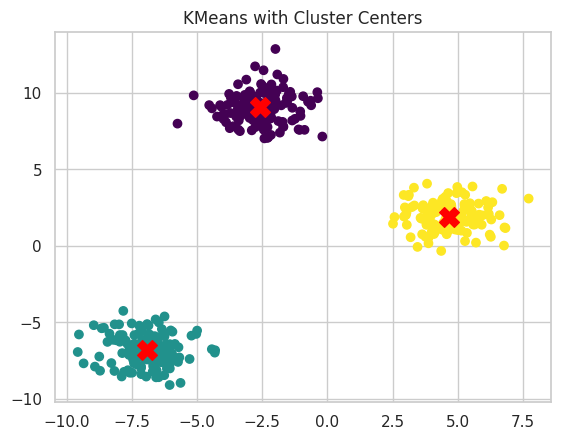

In [19]:
# 17

X, _ = make_blobs(n_samples=400, centers=3, random_state=42)
km = KMeans(n_clusters=3, random_state=42).fit(X)
plt.scatter(X[:,0], X[:,1], c=km.labels_, cmap="viridis")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker="X", c="red", s=200)
plt.title("KMeans with Cluster Centers")
plt.show()

In [20]:
# 18

X = StandardScaler().fit_transform(iris.data)
db = DBSCAN(eps=0.8, min_samples=5).fit(X)
print("Number of noise points in Iris:", np.sum(db.labels_==-1))

Number of noise points in Iris: 4


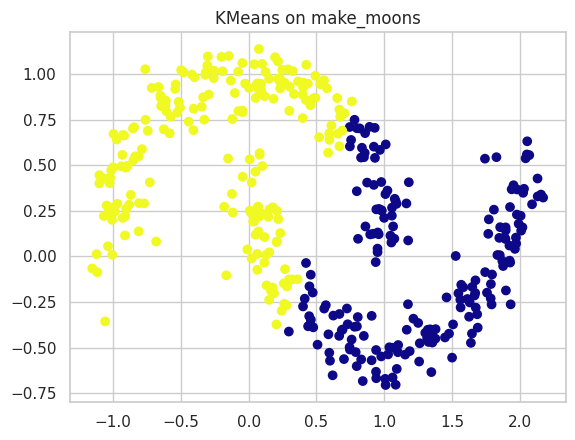

In [21]:
# 19

X, _ = make_moons(n_samples=400, noise=0.1, random_state=42)
km = KMeans(n_clusters=2, random_state=42).fit(X)
plt.scatter(X[:,0], X[:,1], c=km.labels_, cmap="plasma")
plt.title("KMeans on make_moons")
plt.show()

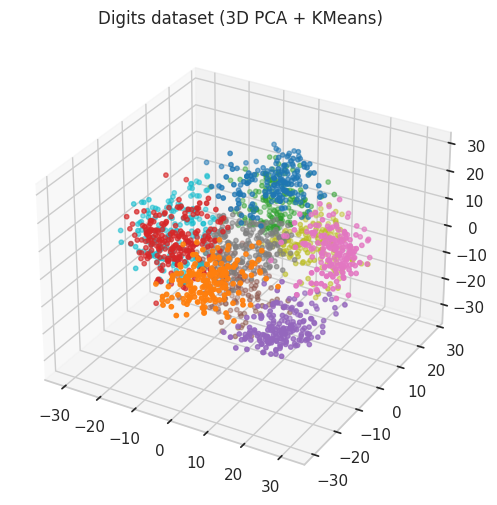

In [22]:
# 20

from mpl_toolkits.mplot3d import Axes3D
X_pca3 = PCA(n_components=3).fit_transform(digits.data)
km = KMeans(n_clusters=10, random_state=42).fit(X_pca3)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], c=km.labels_, cmap="tab10", s=10)
ax.set_title("Digits dataset (3D PCA + KMeans)")
plt.show()

Silhouette Score (5 clusters): 0.678738720085253


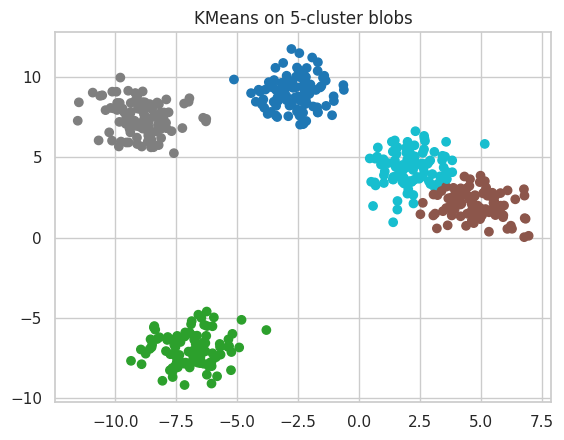

In [31]:
# 21

X, _ = make_blobs(n_samples=500, centers=5, random_state=42)
km = KMeans(n_clusters=5, random_state=42).fit(X)
score = silhouette_score(X, km.labels_)
print("Silhouette Score (5 clusters):", score)

plt.scatter(X[:,0], X[:,1], c=km.labels_, cmap="tab10")
plt.title("KMeans on 5-cluster blobs")
plt.show()

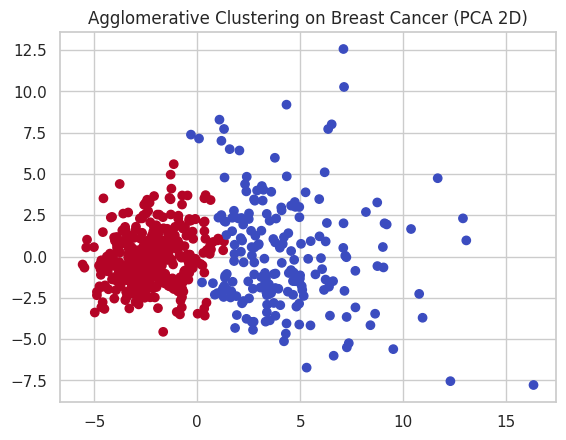

In [32]:
# 22

cancer = load_breast_cancer()
X_scaled = StandardScaler().fit_transform(cancer.data)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

agg = AgglomerativeClustering(n_clusters=2, linkage="ward").fit(X_pca)
plt.scatter(X_pca[:,0], X_pca[:,1], c=agg.labels_, cmap="coolwarm")
plt.title("Agglomerative Clustering on Breast Cancer (PCA 2D)")
plt.show()

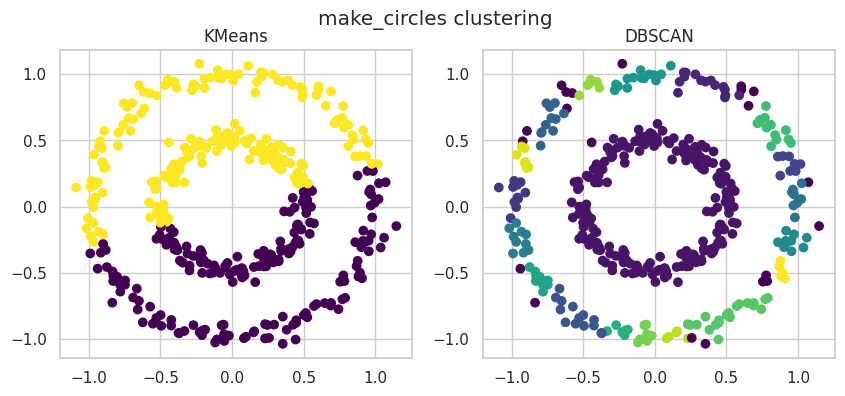

In [33]:
# 23

X, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)
fig, axes = plt.subplots(1,2, figsize=(10,4))

# KMeans
km = KMeans(n_clusters=2, random_state=42).fit(X)
axes[0].scatter(X[:,0], X[:,1], c=km.labels_, cmap="viridis")
axes[0].set_title("KMeans")

# DBSCAN
db = DBSCAN(eps=0.1, min_samples=5).fit(X)
axes[1].scatter(X[:,0], X[:,1], c=db.labels_, cmap="viridis")
axes[1].set_title("DBSCAN")

plt.suptitle("make_circles clustering")
plt.show()

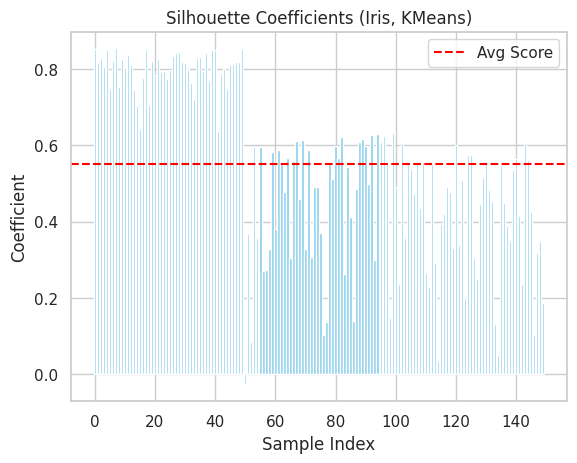

In [41]:
# 24
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Load data
iris = load_iris()
X = iris.data

# KMeans
km = KMeans(n_clusters=3, random_state=42).fit(X)

# Silhouette samples
sil_values = silhouette_samples(X, km.labels_)

# Plot silhouette coefficient for each sample
plt.bar(range(len(sil_values)), sil_values, color="skyblue")
plt.axhline(y=silhouette_score(X, km.labels_), color="red", linestyle="--", label="Avg Score")
plt.title("Silhouette Coefficients (Iris, KMeans)")
plt.xlabel("Sample Index")
plt.ylabel("Coefficient")
plt.legend()
plt.show()

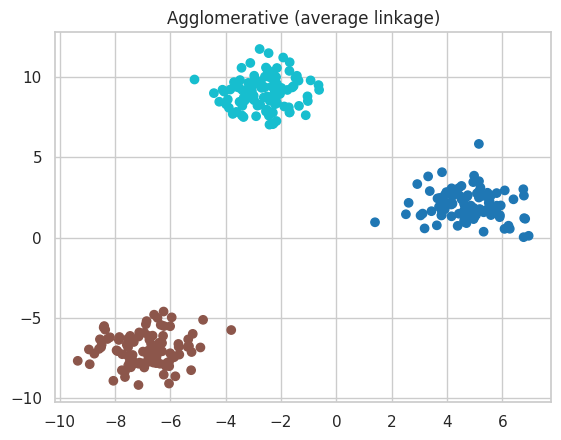

In [35]:
# 25

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
agg = AgglomerativeClustering(n_clusters=3, linkage="average").fit(X)
plt.scatter(X[:,0], X[:,1], c=agg.labels_, cmap="tab10")
plt.title("Agglomerative (average linkage)")
plt.show()

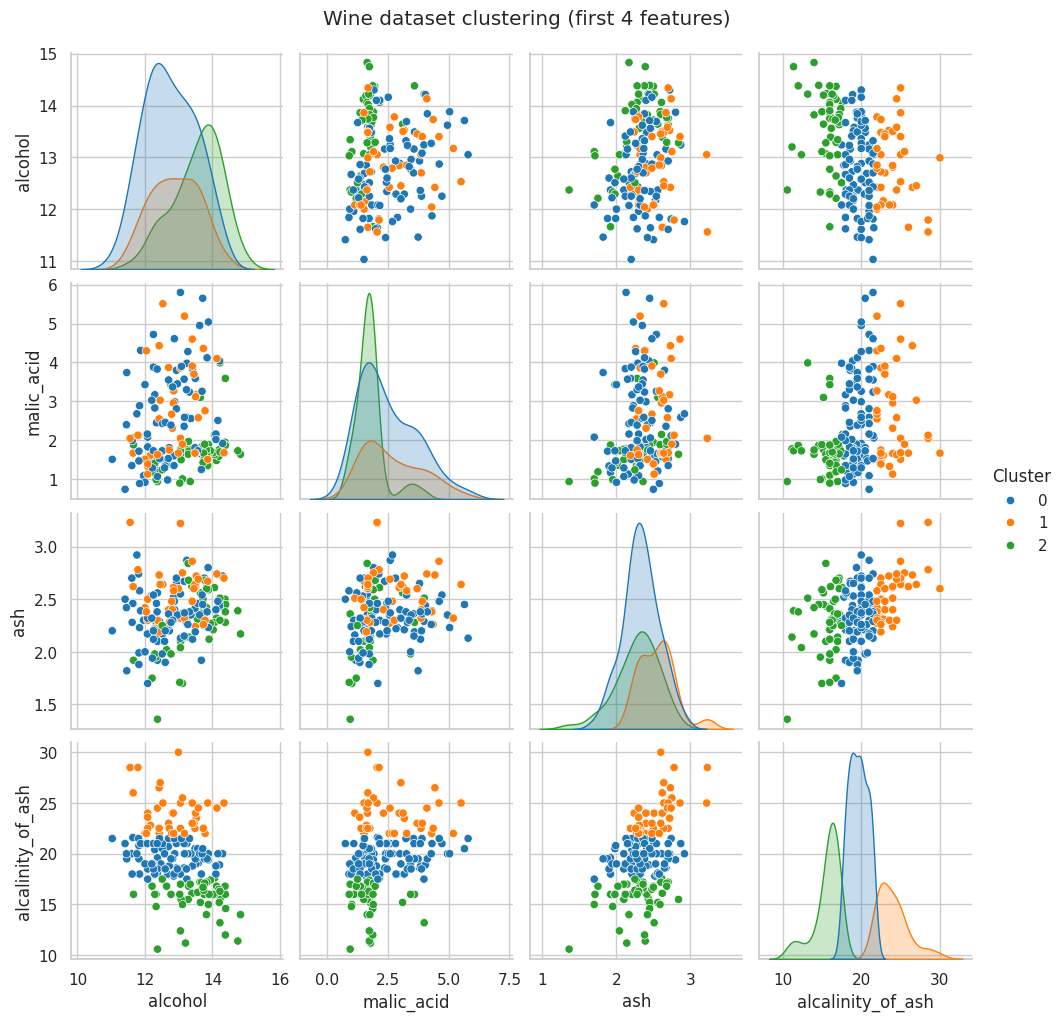

In [36]:
# 26

wine = load_wine()
X = wine.data[:, :4]  # first 4 features
km = KMeans(n_clusters=3, random_state=42).fit(X)

import pandas as pd
df = pd.DataFrame(X, columns=wine.feature_names[:4])
df["Cluster"] = km.labels_

sns.pairplot(df, hue="Cluster", palette="tab10")
plt.suptitle("Wine dataset clustering (first 4 features)", y=1.02)
plt.show()

Number of clusters (DBSCAN): 7
Number of noise points: 91


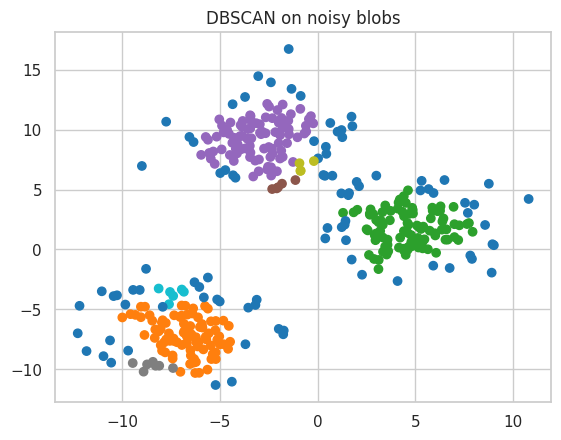

In [37]:
# 27

X, _ = make_blobs(n_samples=400, centers=3, cluster_std=2.0, random_state=42)
db = DBSCAN(eps=0.8, min_samples=5).fit(X)

n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise = np.sum(db.labels_==-1)

print("Number of clusters (DBSCAN):", n_clusters)
print("Number of noise points:", n_noise)

plt.scatter(X[:,0], X[:,1], c=db.labels_, cmap="tab10")
plt.title("DBSCAN on noisy blobs")
plt.show()

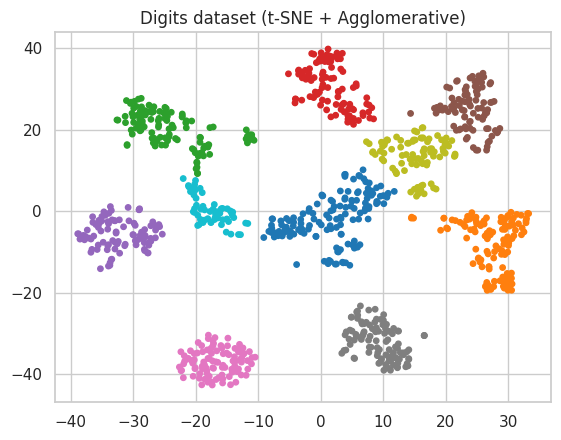

In [38]:
# 28

digits = load_digits()
X_scaled = StandardScaler().fit_transform(digits.data[:1000])  # subset for speed
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)

agg = AgglomerativeClustering(n_clusters=10, linkage="ward").fit(X_tsne)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=agg.labels_, cmap="tab10", s=15)
plt.title("Digits dataset (t-SNE + Agglomerative)")
plt.show()

In [ ]:
# 29

